<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week40.do.txt --no_mako -->
<!-- dom:TITLE: Week 40: Gradient descent methods (continued) and start Neural networks -->

# Week 40: Gradient descent methods (continued) and start Neural networks
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo, Norway

Date: **September 29-October 3, 2025**

## Lecture Monday September 29, 2025
1. Logistic regression and gradient descent, examples on how to code
<!-- o Automatic differentiation and gradient descent, examples using Logistic regression -->

2. Start with the basics of Neural Networks, setting up the basic steps, from the simple perceptron model to the multi-layer perceptron model
<!-- o [Video of lecture](https://youtu.be/jdJoOrCIdII) -->
<!-- o Whiteboard notes at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/HandWrittenNotes/2024/NotesSeptember30.pdf> -->

## Suggested readings and videos
**Readings and Videos:**

1. The lecture notes for week 40 (these notes)
<!-- o For a good discussion on gradient methods, we would like to recommend Goodfellow et al section 4.3-4.5 and# sections 8.3-8.6. We will come back to the latter chapter in our discussion of Neural networks as well. -->

2. For neural networks we recommend Goodfellow et al chapter 6 and Raschka et al chapter 2 (contains also material about gradient descent) and chapter 11 (we will use this next week)
<!-- o Video on gradient descent at <https://www.youtube.com/watch?v=sDv4f4s2SB8> -->
<!-- o Video on automatic differentiation  at <https://www.youtube.com/watch?v=wG_nF1awSSY> -->

3. Neural Networks demystified at <https://www.youtube.com/watch?v=bxe2T-V8XRs&list=PLiaHhY2iBX9hdHaRr6b7XevZtgZRa1PoU&ab_channel=WelchLabs>

4. Building Neural Networks from scratch at URL:https://www.youtube.com/watch?v=Wo5dMEP_BbI&list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3&ab_channel=sentdex"

## Lab sessions Tuesday and Wednesday
**Material for the active learning sessions on Tuesday and Wednesday.**

  * Work on project 1 and discussions on how to structure your report

  * No weekly exercises for week 40, project work only

  * Video on how to write scientific reports recorded during one of the lab sessions at <https://youtu.be/tVW1ZDmZnwM>

  * A general guideline can be found at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/EvaluationGrading/EvaluationForm.md>.

## Logistic Regression, from last week

In linear regression our main interest was centered on learning the
coefficients of a functional fit (say a polynomial) in order to be
able to predict the response of a continuous variable on some unseen
data. The fit to the continuous variable $y_i$ is based on some
independent variables $\boldsymbol{x}_i$. Linear regression resulted in
analytical expressions for standard ordinary Least Squares or Ridge
regression (in terms of matrices to invert) for several quantities,
ranging from the variance and thereby the confidence intervals of the
parameters $\boldsymbol{\theta}$ to the mean squared error. If we can invert
the product of the design matrices, linear regression gives then a
simple recipe for fitting our data.

## Classification problems

Classification problems, however, are concerned with outcomes taking
the form of discrete variables (i.e. categories). We may for example,
on the basis of DNA sequencing for a number of patients, like to find
out which mutations are important for a certain disease; or based on
scans of various patients' brains, figure out if there is a tumor or
not; or given a specific physical system, we'd like to identify its
state, say whether it is an ordered or disordered system (typical
situation in solid state physics); or classify the status of a
patient, whether she/he has a stroke or not and many other similar
situations.

The most common situation we encounter when we apply logistic
regression is that of two possible outcomes, normally denoted as a
binary outcome, true or false, positive or negative, success or
failure etc.

## Optimization and Deep learning

Logistic regression will also serve as our stepping stone towards
neural network algorithms and supervised deep learning. For logistic
learning, the minimization of the cost function leads to a non-linear
equation in the parameters $\boldsymbol{\theta}$. The optimization of the
problem calls therefore for minimization algorithms.

As we have discussed earlier, this forms the
bottle neck of all machine learning algorithms, namely how to find
reliable minima of a multi-variable function. This leads us to the
family of gradient descent methods. The latter are the working horses
of basically all modern machine learning algorithms.

We note also that many of the topics discussed here on logistic 
regression are also commonly used in modern supervised Deep Learning
models, as we will see later.

## Basics

We consider the case where the outputs/targets, also called the
responses or the outcomes, $y_i$ are discrete and only take values
from $k=0,\dots,K-1$ (i.e. $K$ classes).

The goal is to predict the
output classes from the design matrix $\boldsymbol{X}\in\mathbb{R}^{n\times p}$
made of $n$ samples, each of which carries $p$ features or predictors. The
primary goal is to identify the classes to which new unseen samples
belong.

Last week we  specialized to the case of two classes only, with outputs
$y_i=0$ and $y_i=1$. Our outcomes could represent the status of a
credit card user that could default or not on her/his credit card
debt. That is

$$
y_i = \begin{bmatrix} 0 & \mathrm{no}\\  1 & \mathrm{yes} \end{bmatrix}.
$$

## Two parameters

We assume now that we have two classes with $y_i$ either $0$ or $1$. Furthermore we assume also that we have only two parameters $\theta$ in our fitting of the Sigmoid function, that is we define probabilities

$$
\begin{align*}
p(y_i=1|x_i,\boldsymbol{\theta}) &= \frac{\exp{(\theta_0+\theta_1x_i)}}{1+\exp{(\theta_0+\theta_1x_i)}},\nonumber\\
p(y_i=0|x_i,\boldsymbol{\theta}) &= 1 - p(y_i=1|x_i,\boldsymbol{\theta}),
\end{align*}
$$

where $\boldsymbol{\theta}$ are the weights we wish to extract from data, in our case $\theta_0$ and $\theta_1$. 

Note that we used

$$
p(y_i=0\vert x_i, \boldsymbol{\theta}) = 1-p(y_i=1\vert x_i, \boldsymbol{\theta}).
$$

## Maximum likelihood

In order to define the total likelihood for all possible outcomes from a  
dataset $\mathcal{D}=\{(y_i,x_i)\}$, with the binary labels
$y_i\in\{0,1\}$ and where the data points are drawn independently, we use the so-called [Maximum Likelihood Estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) (MLE) principle. 
We aim thus at maximizing 
the probability of seeing the observed data. We can then approximate the 
likelihood in terms of the product of the individual probabilities of a specific outcome $y_i$, that is

$$
\begin{align*}
P(\mathcal{D}|\boldsymbol{\theta})& = \prod_{i=1}^n \left[p(y_i=1|x_i,\boldsymbol{\theta})\right]^{y_i}\left[1-p(y_i=1|x_i,\boldsymbol{\theta}))\right]^{1-y_i}\nonumber \\
\end{align*}
$$

from which we obtain the log-likelihood and our **cost/loss** function

$$
\mathcal{C}(\boldsymbol{\theta}) = \sum_{i=1}^n \left( y_i\log{p(y_i=1|x_i,\boldsymbol{\theta})} + (1-y_i)\log\left[1-p(y_i=1|x_i,\boldsymbol{\theta}))\right]\right).
$$

## The cost function rewritten

Reordering the logarithms, we can rewrite the **cost/loss** function as

$$
\mathcal{C}(\boldsymbol{\theta}) = \sum_{i=1}^n  \left(y_i(\theta_0+\theta_1x_i) -\log{(1+\exp{(\theta_0+\theta_1x_i)})}\right).
$$

The maximum likelihood estimator is defined as the set of parameters that maximize the log-likelihood where we maximize with respect to $\theta$.
Since the cost (error) function is just the negative log-likelihood, for logistic regression we have that

$$
\mathcal{C}(\boldsymbol{\theta})=-\sum_{i=1}^n  \left(y_i(\theta_0+\theta_1x_i) -\log{(1+\exp{(\theta_0+\theta_1x_i)})}\right).
$$

This equation is known in statistics as the **cross entropy**. Finally, we note that just as in linear regression, 
in practice we often supplement the cross-entropy with additional regularization terms, usually $L_1$ and $L_2$ regularization as we did for Ridge and Lasso regression.

## Minimizing the cross entropy

The cross entropy is a convex function of the weights $\boldsymbol{\theta}$ and,
therefore, any local minimizer is a global minimizer. 

Minimizing this
cost function with respect to the two parameters $\theta_0$ and $\theta_1$ we obtain

$$
\frac{\partial \mathcal{C}(\boldsymbol{\theta})}{\partial \theta_0} = -\sum_{i=1}^n  \left(y_i -\frac{\exp{(\theta_0+\theta_1x_i)}}{1+\exp{(\theta_0+\theta_1x_i)}}\right),
$$

and

$$
\frac{\partial \mathcal{C}(\boldsymbol{\theta})}{\partial \theta_1} = -\sum_{i=1}^n  \left(y_ix_i -x_i\frac{\exp{(\theta_0+\theta_1x_i)}}{1+\exp{(\theta_0+\theta_1x_i)}}\right).
$$

## A more compact expression

Let us now define a vector $\boldsymbol{y}$ with $n$ elements $y_i$, an
$n\times p$ matrix $\boldsymbol{X}$ which contains the $x_i$ values and a
vector $\boldsymbol{p}$ of fitted probabilities $p(y_i\vert x_i,\boldsymbol{\theta})$. We can rewrite in a more compact form the first
derivative of the cost function as

$$
\frac{\partial \mathcal{C}(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}} = -\boldsymbol{X}^T\left(\boldsymbol{y}-\boldsymbol{p}\right).
$$

If we in addition define a diagonal matrix $\boldsymbol{W}$ with elements 
$p(y_i\vert x_i,\boldsymbol{\theta})(1-p(y_i\vert x_i,\boldsymbol{\theta})$, we can obtain a compact expression of the second derivative as

$$
\frac{\partial^2 \mathcal{C}(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}\partial \boldsymbol{\theta}^T} = \boldsymbol{X}^T\boldsymbol{W}\boldsymbol{X}.
$$

## Extending to more predictors

Within a binary classification problem, we can easily expand our model to include multiple predictors. Our ratio between likelihoods is then with $p$ predictors

$$
\log{ \frac{p(\boldsymbol{\theta}\boldsymbol{x})}{1-p(\boldsymbol{\theta}\boldsymbol{x})}} = \theta_0+\theta_1x_1+\theta_2x_2+\dots+\theta_px_p.
$$

Here we defined $\boldsymbol{x}=[1,x_1,x_2,\dots,x_p]$ and $\boldsymbol{\theta}=[\theta_0, \theta_1, \dots, \theta_p]$ leading to

$$
p(\boldsymbol{\theta}\boldsymbol{x})=\frac{ \exp{(\theta_0+\theta_1x_1+\theta_2x_2+\dots+\theta_px_p)}}{1+\exp{(\theta_0+\theta_1x_1+\theta_2x_2+\dots+\theta_px_p)}}.
$$

## Including more classes

Till now we have mainly focused on two classes, the so-called binary
system. Suppose we wish to extend to $K$ classes.  Let us for the sake
of simplicity assume we have only two predictors. We have then following model

$$
\log{\frac{p(C=1\vert x)}{p(K\vert x)}} = \theta_{10}+\theta_{11}x_1,
$$

and

$$
\log{\frac{p(C=2\vert x)}{p(K\vert x)}} = \theta_{20}+\theta_{21}x_1,
$$

and so on till the class $C=K-1$ class

$$
\log{\frac{p(C=K-1\vert x)}{p(K\vert x)}} = \theta_{(K-1)0}+\theta_{(K-1)1}x_1,
$$

and the model is specified in term of $K-1$ so-called log-odds or
**logit** transformations.

## More classes

In our discussion of neural networks we will encounter the above again
in terms of a slightly modified function, the so-called **Softmax** function.

The softmax function is used in various multiclass classification
methods, such as multinomial logistic regression (also known as
softmax regression), multiclass linear discriminant analysis, naive
Bayes classifiers, and artificial neural networks.  Specifically, in
multinomial logistic regression and linear discriminant analysis, the
input to the function is the result of $K$ distinct linear functions,
and the predicted probability for the $k$-th class given a sample
vector $\boldsymbol{x}$ and a weighting vector $\boldsymbol{\theta}$ is (with two
predictors):

$$
p(C=k\vert \mathbf {x} )=\frac{\exp{(\theta_{k0}+\theta_{k1}x_1)}}{1+\sum_{l=1}^{K-1}\exp{(\theta_{l0}+\theta_{l1}x_1)}}.
$$

It is easy to extend to more predictors. The final class is

$$
p(C=K\vert \mathbf {x} )=\frac{1}{1+\sum_{l=1}^{K-1}\exp{(\theta_{l0}+\theta_{l1}x_1)}},
$$

and they sum to one. Our earlier discussions were all specialized to
the case with two classes only. It is easy to see from the above that
what we derived earlier is compatible with these equations.

To find the optimal parameters we would typically use a gradient
descent method.  Newton's method and gradient descent methods are
discussed in the material on [optimization
methods](https://compphysics.github.io/MachineLearning/doc/pub/Splines/html/Splines-bs.html).

## Optimization, the central part of any Machine Learning algortithm

Almost every problem in machine learning and data science starts with
a dataset $X$, a model $g(\theta)$, which is a function of the
parameters $\theta$ and a cost function $C(X, g(\theta))$ that allows
us to judge how well the model $g(\theta)$ explains the observations
$X$. The model is fit by finding the values of $\theta$ that minimize
the cost function. Ideally we would be able to solve for $\theta$
analytically, however this is not possible in general and we must use
some approximative/numerical method to compute the minimum.

## Revisiting our Logistic Regression case

In our discussion on Logistic Regression we studied the 
case of
two classes, with $y_i$ either
$0$ or $1$. Furthermore we assumed also that we have only two
parameters $\theta$ in our fitting, that is we
defined probabilities

$$
\begin{align*}
p(y_i=1|x_i,\boldsymbol{\theta}) &= \frac{\exp{(\theta_0+\theta_1x_i)}}{1+\exp{(\theta_0+\theta_1x_i)}},\nonumber\\
p(y_i=0|x_i,\boldsymbol{\theta}) &= 1 - p(y_i=1|x_i,\boldsymbol{\theta}),
\end{align*}
$$

where $\boldsymbol{\theta}$ are the weights we wish to extract from data, in our case $\theta_0$ and $\theta_1$.

## The equations to solve

Our compact equations used a definition of a vector $\boldsymbol{y}$ with $n$
elements $y_i$, an $n\times p$ matrix $\boldsymbol{X}$ which contains the
$x_i$ values and a vector $\boldsymbol{p}$ of fitted probabilities
$p(y_i\vert x_i,\boldsymbol{\theta})$. We rewrote in a more compact form
the first derivative of the cost function as

$$
\frac{\partial \mathcal{C}(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}} = -\boldsymbol{X}^T\left(\boldsymbol{y}-\boldsymbol{p}\right).
$$

If we in addition define a diagonal matrix $\boldsymbol{W}$ with elements 
$p(y_i\vert x_i,\boldsymbol{\theta})(1-p(y_i\vert x_i,\boldsymbol{\theta})$, we can obtain a compact expression of the second derivative as

$$
\frac{\partial^2 \mathcal{C}(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}\partial \boldsymbol{\theta}^T} = \boldsymbol{X}^T\boldsymbol{W}\boldsymbol{X}.
$$

This defines what is called  the Hessian matrix.

## Solving using Newton-Raphson's method

If we can set up these equations, Newton-Raphson's iterative method is normally the method of choice. It requires however that we can compute in an efficient way the  matrices that define the first and second derivatives. 

Our iterative scheme is then given by

$$
\boldsymbol{\theta}^{\mathrm{new}} = \boldsymbol{\theta}^{\mathrm{old}}-\left(\frac{\partial^2 \mathcal{C}(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}\partial \boldsymbol{\theta}^T}\right)^{-1}_{\boldsymbol{\theta}^{\mathrm{old}}}\times \left(\frac{\partial \mathcal{C}(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}}\right)_{\boldsymbol{\theta}^{\mathrm{old}}},
$$

or in matrix form as

$$
\boldsymbol{\theta}^{\mathrm{new}} = \boldsymbol{\theta}^{\mathrm{old}}-\left(\boldsymbol{X}^T\boldsymbol{W}\boldsymbol{X} \right)^{-1}\times \left(-\boldsymbol{X}^T(\boldsymbol{y}-\boldsymbol{p}) \right)_{\boldsymbol{\theta}^{\mathrm{old}}}.
$$

The right-hand side is computed with the old values of $\theta$. 

If we can compute these matrices, in particular the Hessian, the above is often the easiest method to implement.

## Example code for Logistic Regression

Here we make a class for Logistic regression. The code uses a simple data set and includes both a binary case and a multiclass case.

In [1]:
import numpy as np

class LogisticRegression:
    """
    Logistic Regression for binary and multiclass classification.
    """
    def __init__(self, lr=0.01, epochs=1000, fit_intercept=True, verbose=False):
        self.lr = lr                  # Learning rate for gradient descent
        self.epochs = epochs          # Number of iterations
        self.fit_intercept = fit_intercept  # Whether to add intercept (bias)
        self.verbose = verbose        # Print loss during training if True
        self.weights = None
        self.multi_class = False      # Will be determined at fit time

    def _add_intercept(self, X):
        """Add intercept term (column of ones) to feature matrix."""
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def _sigmoid(self, z):
        """Sigmoid function for binary logistic."""
        return 1 / (1 + np.exp(-z))

    def _softmax(self, Z):
        """Softmax function for multiclass logistic."""
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

    def fit(self, X, y):
        """
        Train the logistic regression model using gradient descent.
        Supports binary (sigmoid) and multiclass (softmax) based on y.
        """
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape

        # Add intercept if needed
        if self.fit_intercept:
            X = self._add_intercept(X)
            n_features += 1

        # Determine classes and mode (binary vs multiclass)
        unique_classes = np.unique(y)
        if len(unique_classes) > 2:
            self.multi_class = True
        else:
            self.multi_class = False

        # ----- Multiclass case -----
        if self.multi_class:
            n_classes = len(unique_classes)
            # Map original labels to 0...n_classes-1
            class_to_index = {c: idx for idx, c in enumerate(unique_classes)}
            y_indices = np.array([class_to_index[c] for c in y])
            # Initialize weight matrix (features x classes)
            self.weights = np.zeros((n_features, n_classes))

            # One-hot encode y
            Y_onehot = np.zeros((n_samples, n_classes))
            Y_onehot[np.arange(n_samples), y_indices] = 1

            # Gradient descent
            for epoch in range(self.epochs):
                scores = X.dot(self.weights)          # Linear scores (n_samples x n_classes)
                probs = self._softmax(scores)        # Probabilities (n_samples x n_classes)
                # Compute gradient (features x classes)
                gradient = (1 / n_samples) * X.T.dot(probs - Y_onehot)
                # Update weights
                self.weights -= self.lr * gradient

                if self.verbose and epoch % 100 == 0:
                    # Compute current loss (categorical cross-entropy)
                    loss = -np.sum(Y_onehot * np.log(probs + 1e-15)) / n_samples
                    print(f"[Epoch {epoch}] Multiclass loss: {loss:.4f}")

        # ----- Binary case -----
        else:
            # Convert y to 0/1 if not already
            if not np.array_equal(unique_classes, [0, 1]):
                # Map the two classes to 0 and 1
                class0, class1 = unique_classes
                y_binary = np.where(y == class1, 1, 0)
            else:
                y_binary = y.copy().astype(int)

            # Initialize weights vector (features,)
            self.weights = np.zeros(n_features)

            # Gradient descent
            for epoch in range(self.epochs):
                linear_model = X.dot(self.weights)     # (n_samples,)
                probs = self._sigmoid(linear_model)   # (n_samples,)
                # Gradient for binary cross-entropy
                gradient = (1 / n_samples) * X.T.dot(probs - y_binary)
                self.weights -= self.lr * gradient

                if self.verbose and epoch % 100 == 0:
                    # Compute binary cross-entropy loss
                    loss = -np.mean(
                        y_binary * np.log(probs + 1e-15) + 
                        (1 - y_binary) * np.log(1 - probs + 1e-15)
                    )
                    print(f"[Epoch {epoch}] Binary loss: {loss:.4f}")

    def predict_prob(self, X):
        """
        Compute probability estimates. Returns a 1D array for binary or
        a 2D array (n_samples x n_classes) for multiclass.
        """
        X = np.array(X)
        # Add intercept if the model used it
        if self.fit_intercept:
            X = self._add_intercept(X)
        scores = X.dot(self.weights)
        if self.multi_class:
            return self._softmax(scores)
        else:
            return self._sigmoid(scores)

    def predict(self, X):
        """
        Predict class labels for samples in X.
        Returns integer class labels (0,1 for binary, or 0...C-1 for multiclass).
        """
        probs = self.predict_prob(X)
        if self.multi_class:
            # Choose class with highest probability
            return np.argmax(probs, axis=1)
        else:
            # Threshold at 0.5 for binary
            return (probs >= 0.5).astype(int)

The class implements the sigmoid and softmax internally. During fit(),
we check the number of classes: if more than 2, we set
self.multi_class=True and perform multinomial logistic regression. We
one-hot encode the target vector and update a weight matrix with
softmax probabilities. Otherwise, we do standard binary logistic
regression, converting labels to 0/1 if needed and updating a weight
vector. In both cases we use batch gradient descent on the
cross-entropy loss (we add a small epsilon 1e-15 to logs for numerical
stability). Progress (loss) can be printed if verbose=True.

In [4]:
# Evaluation Metrics
#We define helper functions for accuracy and cross-entropy loss. Accuracy is the fraction of correct predictions . For loss, we compute the appropriate cross-entropy:

def accuracy_score(y_true, y_pred):
    """Accuracy = (# correct predictions) / (total samples)."""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(y_true == y_pred)

def binary_cross_entropy(y_true, y_prob):
    """
    Binary cross-entropy loss.
    y_true: true binary labels (0 or 1), y_prob: predicted probabilities for class 1.
    """
    y_true = np.array(y_true)
    y_prob = np.clip(np.array(y_prob), 1e-15, 1-1e-15)
    return -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))

def categorical_cross_entropy(y_true, y_prob):
    """
    Categorical cross-entropy loss for multiclass.
    y_true: true labels (0...C-1), y_prob: array of predicted probabilities (n_samples x C).
    """
    y_true = np.array(y_true, dtype=int)
    y_prob = np.clip(np.array(y_prob), 1e-15, 1-1e-15)
    # One-hot encode true labels
    n_samples, n_classes = y_prob.shape
    one_hot = np.zeros_like(y_prob)
    one_hot[np.arange(n_samples), y_true] = 1
    # Compute cross-entropy
    loss_vec = -np.sum(one_hot * np.log(y_prob), axis=1)
    return np.mean(loss_vec)

### Synthetic data generation

Binary classification data: Create two Gaussian clusters in 2D. For example, class 0 around mean [-2,-2] and class 1 around [2,2].
Multiclass data: Create several Gaussian clusters (one per class) spread out in feature space.

In [5]:
import numpy as np

def generate_binary_data(n_samples=100, n_features=2, random_state=None):
    """
    Generate synthetic binary classification data.
    Returns (X, y) where X is (n_samples x n_features), y in {0,1}.
    """
    rng = np.random.RandomState(random_state)
    # Half samples for class 0, half for class 1
    n0 = n_samples // 2
    n1 = n_samples - n0
    # Class 0 around mean -2, class 1 around +2
    mean0 = -2 * np.ones(n_features)
    mean1 =  2 * np.ones(n_features)
    X0 = rng.randn(n0, n_features) + mean0
    X1 = rng.randn(n1, n_features) + mean1
    X = np.vstack((X0, X1))
    y = np.array([0]*n0 + [1]*n1)
    return X, y

def generate_multiclass_data(n_samples=150, n_features=2, n_classes=3, random_state=None):
    """
    Generate synthetic multiclass data with n_classes Gaussian clusters.
    """
    rng = np.random.RandomState(random_state)
    X = []
    y = []
    samples_per_class = n_samples // n_classes
    for cls in range(n_classes):
        # Random cluster center for each class
        center = rng.uniform(-5, 5, size=n_features)
        Xi = rng.randn(samples_per_class, n_features) + center
        yi = [cls] * samples_per_class
        X.append(Xi)
        y.extend(yi)
    X = np.vstack(X)
    y = np.array(y)
    return X, y


# Generate and test on binary data
X_bin, y_bin = generate_binary_data(n_samples=200, n_features=2, random_state=42)
model_bin = LogisticRegression(lr=0.1, epochs=1000)
model_bin.fit(X_bin, y_bin)
y_prob_bin = model_bin.predict_prob(X_bin)      # probabilities for class 1
y_pred_bin = model_bin.predict(X_bin)           # predicted classes 0 or 1

acc_bin = accuracy_score(y_bin, y_pred_bin)
loss_bin = binary_cross_entropy(y_bin, y_prob_bin)
print(f"Binary Classification - Accuracy: {acc_bin:.2f}, Cross-Entropy Loss: {loss_bin:.2f}")
#For multiclass:
# Generate and test on multiclass data
X_multi, y_multi = generate_multiclass_data(n_samples=300, n_features=2, n_classes=3, random_state=1)
model_multi = LogisticRegression(lr=0.1, epochs=1000)
model_multi.fit(X_multi, y_multi)
y_prob_multi = model_multi.predict_prob(X_multi)     # (n_samples x 3) probabilities
y_pred_multi = model_multi.predict(X_multi)          # predicted labels 0,1,2

acc_multi = accuracy_score(y_multi, y_pred_multi)
loss_multi = categorical_cross_entropy(y_multi, y_prob_multi)
print(f"Multiclass Classification - Accuracy: {acc_multi:.2f}, Cross-Entropy Loss: {loss_multi:.2f}")

# CSV Export
import csv

# Export binary results
with open('binary_results.csv', mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["TrueLabel", "PredictedLabel"])
    for true, pred in zip(y_bin, y_pred_bin):
        writer.writerow([true, pred])

# Export multiclass results
with open('multiclass_results.csv', mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["TrueLabel", "PredictedLabel"])
    for true, pred in zip(y_multi, y_pred_multi):
        writer.writerow([true, pred])

Binary Classification - Accuracy: 0.99, Cross-Entropy Loss: 0.01
Multiclass Classification - Accuracy: 0.97, Cross-Entropy Loss: 0.12


## Using **Scikit-learn**

We show here how we can use a logistic regression case on a data set
included in _scikit_learn_, the so-called Wisconsin breast cancer data
using Logistic regression as our algorithm for classification. This is
a widely studied data set and can easily be included in demonstrations
of classification problems.

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# Load the data
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
print(X_train.shape)
print(X_test.shape)
# Logistic Regression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression: {:.2f}".format(logreg.score(X_test,y_test)))

(426, 30)
(143, 30)
Test set accuracy with Logistic Regression: 0.95


/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Using the correlation matrix

In addition to the above scores, we could also study the covariance (and the correlation matrix).
We use **Pandas** to compute the correlation matrix.

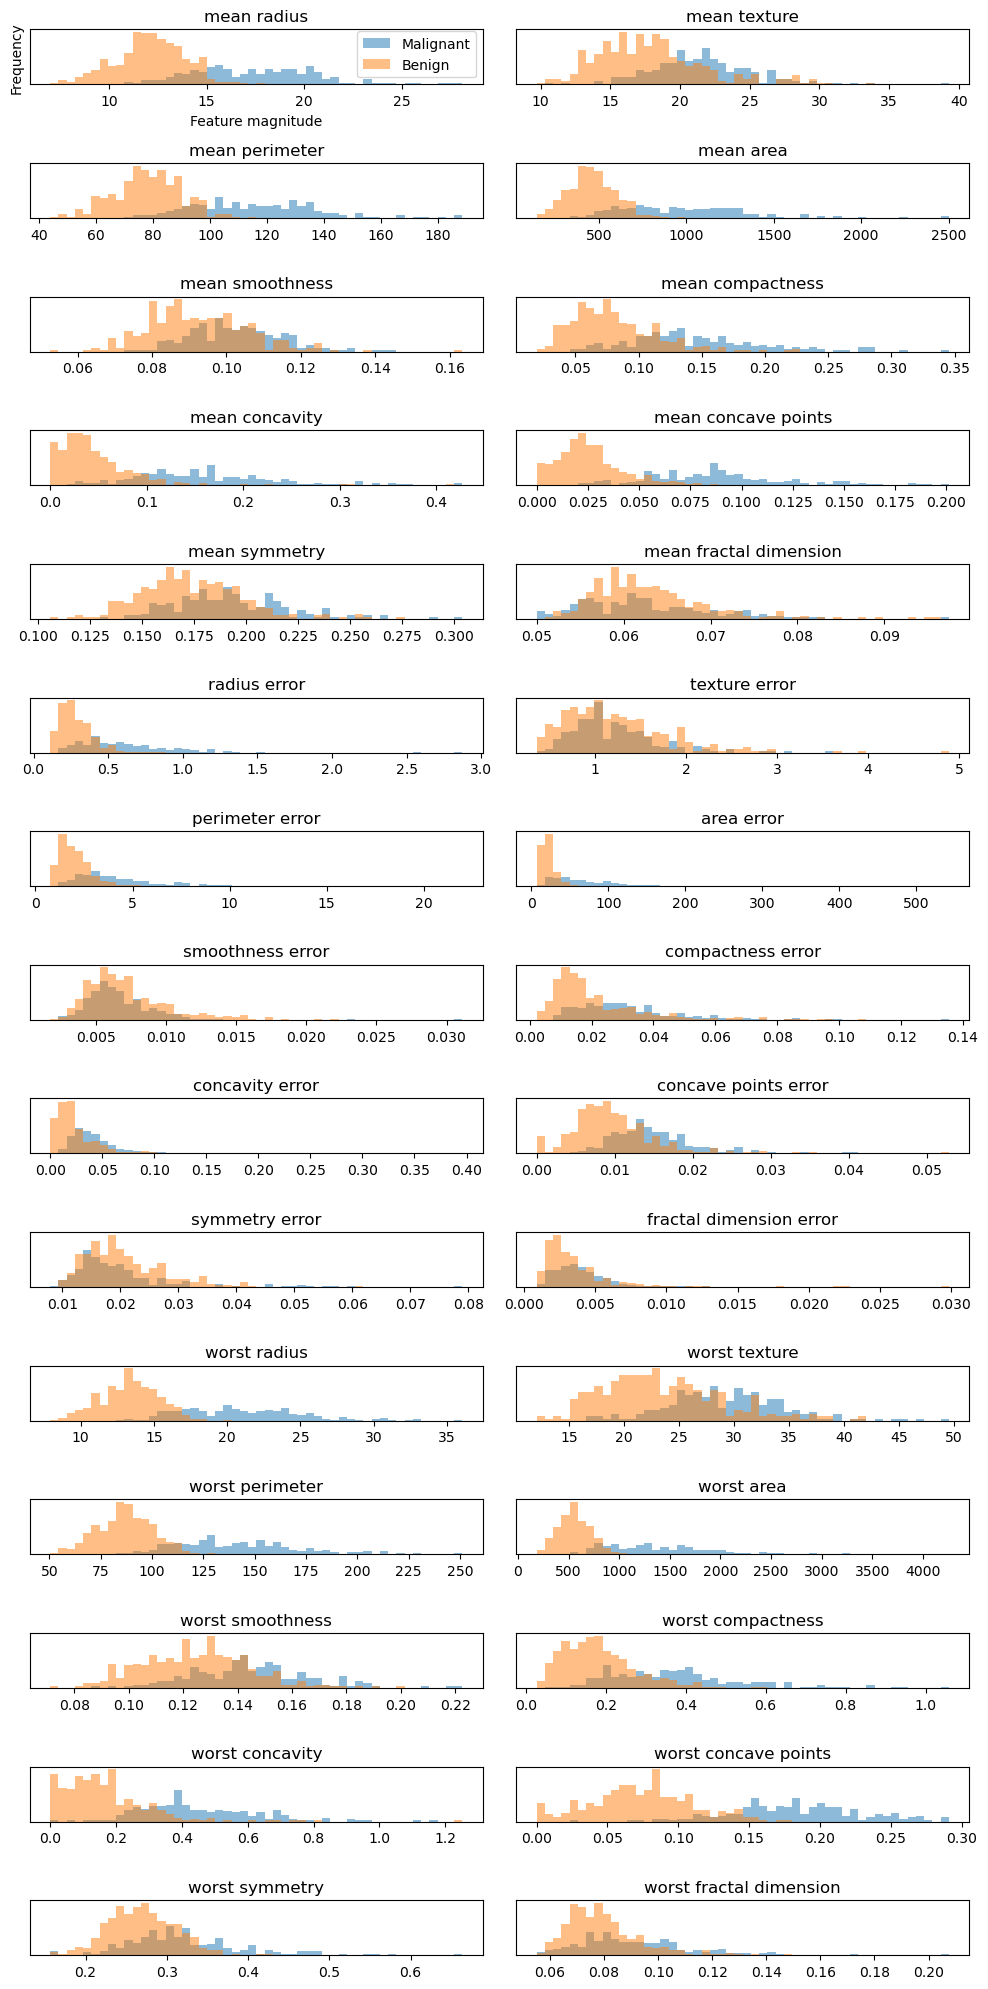

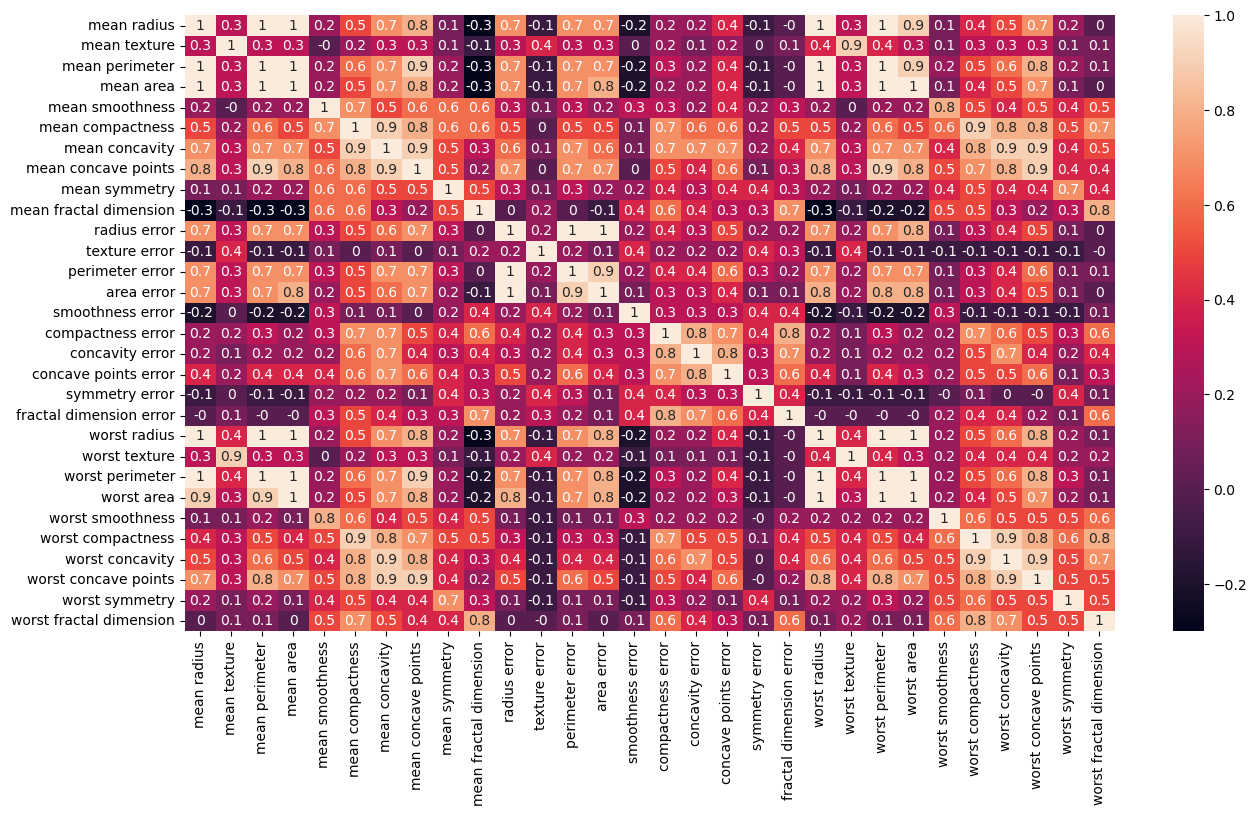

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()
import pandas as pd
# Making a data frame
cancerpd = pd.DataFrame(cancer.data, columns=cancer.feature_names)

fig, axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins =50)
    ax[i].hist(malignant[:,i], bins = bins, alpha = 0.5)
    ax[i].hist(benign[:,i], bins = bins, alpha = 0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["Malignant", "Benign"], loc ="best")
fig.tight_layout()
plt.show()

import seaborn as sns
correlation_matrix = cancerpd.corr().round(1)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
plt.figure(figsize=(15,8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

## Discussing the correlation data

In the above example we note two things. In the first plot we display
the overlap of benign and malignant tumors as functions of the various
features in the Wisconsin data set. We see that for
some of the features we can distinguish clearly the benign and
malignant cases while for other features we cannot. This can point to
us which features may be of greater interest when we wish to classify
a benign or not benign tumour.

In the second figure we have computed the so-called correlation
matrix, which in our case with thirty features becomes a $30\times 30$
matrix.

We constructed this matrix using **pandas** via the statements

In [6]:
cancerpd = pd.DataFrame(cancer.data, columns=cancer.feature_names)

and then

In [7]:
correlation_matrix = cancerpd.corr().round(1)

Diagonalizing this matrix we can in turn say something about which
features are of relevance and which are not. This leads  us to
the classical Principal Component Analysis (PCA) theorem with
applications. This will be discussed later this semester.

## Other measures in classification studies

(426, 30)
(143, 30)


/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

[1.         0.86666667 1.         0.85714286 1.         0.85714286
 1.         0.92857143 0.92857143 1.        ]
Test set accuracy with Logistic Regression: 0.95


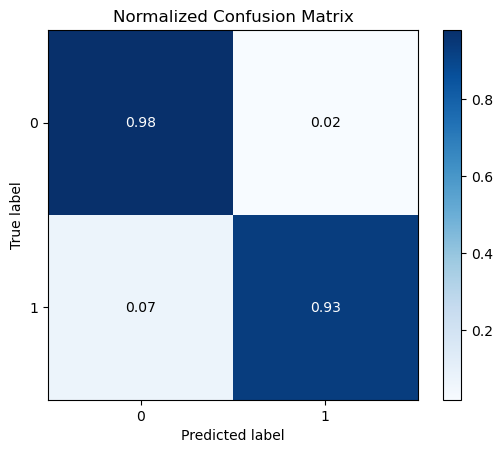

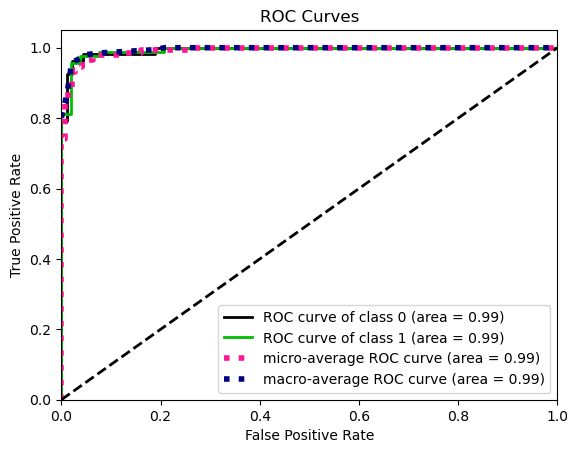

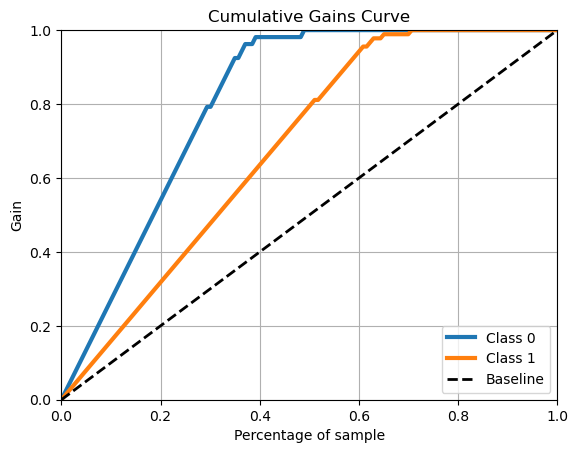

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# Load the data
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
print(X_train.shape)
print(X_test.shape)
# Logistic Regression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
#Cross validation
accuracy = cross_validate(logreg,X_test,y_test,cv=10)['test_score']
print(accuracy)
print("Test set accuracy with Logistic Regression: {:.2f}".format(logreg.score(X_test,y_test)))

import scikitplot as skplt
y_pred = logreg.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
y_probas = logreg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

## Introduction to Neural networks

Artificial neural networks are computational systems that can learn to
perform tasks by considering examples, generally without being
programmed with any task-specific rules. It is supposed to mimic a
biological system, wherein neurons interact by sending signals in the
form of mathematical functions between layers. All layers can contain
an arbitrary number of neurons, and each connection is represented by
a weight variable.

## Artificial neurons

The field of artificial neural networks has a long history of
development, and is closely connected with the advancement of computer
science and computers in general. A model of artificial neurons was
first developed by McCulloch and Pitts in 1943 to study signal
processing in the brain and has later been refined by others. The
general idea is to mimic neural networks in the human brain, which is
composed of billions of neurons that communicate with each other by
sending electrical signals.  Each neuron accumulates its incoming
signals, which must exceed an activation threshold to yield an
output. If the threshold is not overcome, the neuron remains inactive,
i.e. has zero output.

This behaviour has inspired a simple mathematical model for an artificial neuron.

<!-- Equation labels as ordinary links -->
<div id="artificialNeuron"></div>

$$
\begin{equation}
 y = f\left(\sum_{i=1}^n w_ix_i\right) = f(u)
\label{artificialNeuron} \tag{1}
\end{equation}
$$

Here, the output $y$ of the neuron is the value of its activation function, which have as input
a weighted sum of signals $x_i, \dots ,x_n$ received by $n$ other neurons.

Conceptually, it is helpful to divide neural networks into four
categories:
1. general purpose neural networks for supervised learning,

2. neural networks designed specifically for image processing, the most prominent example of this class being Convolutional Neural Networks (CNNs),

3. neural networks for sequential data such as Recurrent Neural Networks (RNNs), and

4. neural networks for unsupervised learning such as Deep Boltzmann Machines.

In natural science, DNNs and CNNs have already found numerous
applications. In statistical physics, they have been applied to detect
phase transitions in 2D Ising and Potts models, lattice gauge
theories, and different phases of polymers, or solving the
Navier-Stokes equation in weather forecasting.  Deep learning has also
found interesting applications in quantum physics. Various quantum
phase transitions can be detected and studied using DNNs and CNNs,
topological phases, and even non-equilibrium many-body
localization. Representing quantum states as DNNs quantum state
tomography are among some of the impressive achievements to reveal the
potential of DNNs to facilitate the study of quantum systems.

In quantum information theory, it has been shown that one can perform
gate decompositions with the help of neural. 

The applications are not limited to the natural sciences. There is a
plethora of applications in essentially all disciplines, from the
humanities to life science and medicine.

## Neural network types

An artificial neural network (ANN), is a computational model that
consists of layers of connected neurons, or nodes or units.  We will
refer to these interchangeably as units or nodes, and sometimes as
neurons.

It is supposed to mimic a biological nervous system by letting each
neuron interact with other neurons by sending signals in the form of
mathematical functions between layers.  A wide variety of different
ANNs have been developed, but most of them consist of an input layer,
an output layer and eventual layers in-between, called *hidden
layers*. All layers can contain an arbitrary number of nodes, and each
connection between two nodes is associated with a weight variable.

Neural networks (also called neural nets) are neural-inspired
nonlinear models for supervised learning.  As we will see, neural nets
can be viewed as natural, more powerful extensions of supervised
learning methods such as linear and logistic regression and soft-max
methods we discussed earlier.

## Feed-forward neural networks

The feed-forward neural network (FFNN) was the first and simplest type
of ANNs that were devised. In this network, the information moves in
only one direction: forward through the layers.

Nodes are represented by circles, while the arrows display the
connections between the nodes, including the direction of information
flow. Additionally, each arrow corresponds to a weight variable
(figure to come).  We observe that each node in a layer is connected
to *all* nodes in the subsequent layer, making this a so-called
*fully-connected* FFNN.

## Convolutional Neural Network

A different variant of FFNNs are *convolutional neural networks*
(CNNs), which have a connectivity pattern inspired by the animal
visual cortex. Individual neurons in the visual cortex only respond to
stimuli from small sub-regions of the visual field, called a receptive
field. This makes the neurons well-suited to exploit the strong
spatially local correlation present in natural images. The response of
each neuron can be approximated mathematically as a convolution
operation.  (figure to come)

Convolutional neural networks emulate the behaviour of neurons in the
visual cortex by enforcing a *local* connectivity pattern between
nodes of adjacent layers: Each node in a convolutional layer is
connected only to a subset of the nodes in the previous layer, in
contrast to the fully-connected FFNN.  Often, CNNs consist of several
convolutional layers that learn local features of the input, with a
fully-connected layer at the end, which gathers all the local data and
produces the outputs. They have wide applications in image and video
recognition.

## Recurrent neural networks

So far we have only mentioned ANNs where information flows in one
direction: forward. *Recurrent neural networks* on the other hand,
have connections between nodes that form directed *cycles*. This
creates a form of internal memory which are able to capture
information on what has been calculated before; the output is
dependent on the previous computations. Recurrent NNs make use of
sequential information by performing the same task for every element
in a sequence, where each element depends on previous elements. An
example of such information is sentences, making recurrent NNs
especially well-suited for handwriting and speech recognition.

## Other types of networks

There are many other kinds of ANNs that have been developed. One type
that is specifically designed for interpolation in multidimensional
space is the radial basis function (RBF) network. RBFs are typically
made up of three layers: an input layer, a hidden layer with
non-linear radial symmetric activation functions and a linear output
layer (''linear'' here means that each node in the output layer has a
linear activation function). The layers are normally fully-connected
and there are no cycles, thus RBFs can be viewed as a type of
fully-connected FFNN. They are however usually treated as a separate
type of NN due the unusual activation functions.

## Multilayer perceptrons

One uses often so-called fully-connected feed-forward neural networks
with three or more layers (an input layer, one or more hidden layers
and an output layer) consisting of neurons that have non-linear
activation functions.

Such networks are often called *multilayer perceptrons* (MLPs).

## Why multilayer perceptrons?

According to the *Universal approximation theorem*, a feed-forward
neural network with just a single hidden layer containing a finite
number of neurons can approximate a continuous multidimensional
function to arbitrary accuracy, assuming the activation function for
the hidden layer is a **non-constant, bounded and
monotonically-increasing continuous function**.

Note that the requirements on the activation function only applies to
the hidden layer, the output nodes are always assumed to be linear, so
as to not restrict the range of output values.

## Illustration of a single perceptron model and a multi-perceptron model

<!-- dom:FIGURE: [figures/nns.png, width=600 frac=0.8]  In a) we show a single perceptron model while in b) we dispay a network with two  hidden layers, an input layer and an output layer. -->
<!-- begin figure -->

<img src="figures/nns.png" width="600"><p style="font-size: 0.9em"><i>Figure 1: In a) we show a single perceptron model while in b) we dispay a network with two  hidden layers, an input layer and an output layer.</i></p>
<!-- end figure -->

## Examples of XOR, OR and AND gates

Let us first try to fit various gates using standard linear
regression. The gates we are thinking of are the classical XOR, OR and
AND gates, well-known elements in computer science. The tables here
show how we can set up the inputs $x_1$ and $x_2$ in order to yield a
specific target $y_i$.

In [9]:
"""
Simple code that tests XOR, OR and AND gates with linear regression
"""

import numpy as np
# Design matrix
X = np.array([ [1, 0, 0], [1, 0, 1], [1, 1, 0],[1, 1, 1]],dtype=np.float64)
print(f"The X.TX  matrix:{X.T @ X}")
Xinv = np.linalg.pinv(X.T @ X)
print(f"The invers of X.TX  matrix:{Xinv}")

# The XOR gate 
yXOR = np.array( [ 0, 1 ,1, 0])
ThetaXOR  = Xinv @ X.T @ yXOR
print(f"The values of theta for the XOR gate:{ThetaXOR}")
print(f"The linear regression prediction  for the XOR gate:{X @ ThetaXOR}")


# The OR gate 
yOR = np.array( [ 0, 1 ,1, 1])
ThetaOR  = Xinv @ X.T @ yOR
print(f"The values of theta for the OR gate:{ThetaOR}")
print(f"The linear regression prediction  for the OR gate:{X @ ThetaOR}")


# The OR gate 
yAND = np.array( [ 0, 0 ,0, 1])
ThetaAND  = Xinv @ X.T @ yAND
print(f"The values of theta for the AND gate:{ThetaAND}")
print(f"The linear regression prediction  for the AND gate:{X @ ThetaAND}")

The X.TX  matrix:[[4. 2. 2.]
 [2. 2. 1.]
 [2. 1. 2.]]
The invers of X.TX  matrix:[[ 7.50000000e-01 -5.00000000e-01 -5.00000000e-01]
 [-5.00000000e-01  1.00000000e+00 -2.27693602e-16]
 [-5.00000000e-01  9.94484047e-17  1.00000000e+00]]
The values of theta for the XOR gate:[ 5.00000000e-01 -2.22044605e-16 -1.11022302e-16]
The linear regression prediction  for the XOR gate:[0.5 0.5 0.5 0.5]
The values of theta for the OR gate:[0.25 0.5  0.5 ]
The linear regression prediction  for the OR gate:[0.25 0.75 0.75 1.25]
The values of theta for the AND gate:[-0.25  0.5   0.5 ]
The linear regression prediction  for the AND gate:[-0.25  0.25  0.25  0.75]


What is happening here?

## Does Logistic Regression do a better Job?

In [10]:
"""
Simple code that tests XOR and OR gates with linear regression
and logistic regression
"""

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

# Design matrix
X = np.array([ [1, 0, 0], [1, 0, 1], [1, 1, 0],[1, 1, 1]],dtype=np.float64)
print(f"The X.TX  matrix:{X.T @ X}")
Xinv = np.linalg.pinv(X.T @ X)
print(f"The invers of X.TX  matrix:{Xinv}")

# The XOR gate 
yXOR = np.array( [ 0, 1 ,1, 0])
ThetaXOR  = Xinv @ X.T @ yXOR
print(f"The values of theta for the XOR gate:{ThetaXOR}")
print(f"The linear regression prediction  for the XOR gate:{X @ ThetaXOR}")


# The OR gate 
yOR = np.array( [ 0, 1 ,1, 1])
ThetaOR  = Xinv @ X.T @ yOR
print(f"The values of theta for the OR gate:{ThetaOR}")
print(f"The linear regression prediction  for the OR gate:{X @ ThetaOR}")


# The OR gate 
yAND = np.array( [ 0, 0 ,0, 1])
ThetaAND  = Xinv @ X.T @ yAND
print(f"The values of theta for the AND gate:{ThetaAND}")
print(f"The linear regression prediction  for the AND gate:{X @ ThetaAND}")

# Now we change to logistic regression


# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X, yOR)
print("Test set accuracy with Logistic Regression for OR gate: {:.2f}".format(logreg.score(X,yOR)))

logreg.fit(X, yXOR)
print("Test set accuracy with Logistic Regression for XOR gate: {:.2f}".format(logreg.score(X,yXOR)))


logreg.fit(X, yAND)
print("Test set accuracy with Logistic Regression for AND gate: {:.2f}".format(logreg.score(X,yAND)))

The X.TX  matrix:[[4. 2. 2.]
 [2. 2. 1.]
 [2. 1. 2.]]
The invers of X.TX  matrix:[[ 7.50000000e-01 -5.00000000e-01 -5.00000000e-01]
 [-5.00000000e-01  1.00000000e+00 -2.27693602e-16]
 [-5.00000000e-01  9.94484047e-17  1.00000000e+00]]
The values of theta for the XOR gate:[ 5.00000000e-01 -2.22044605e-16 -1.11022302e-16]
The linear regression prediction  for the XOR gate:[0.5 0.5 0.5 0.5]
The values of theta for the OR gate:[0.25 0.5  0.5 ]
The linear regression prediction  for the OR gate:[0.25 0.75 0.75 1.25]
The values of theta for the AND gate:[-0.25  0.5   0.5 ]
The linear regression prediction  for the AND gate:[-0.25  0.25  0.25  0.75]
Test set accuracy with Logistic Regression for OR gate: 0.75
Test set accuracy with Logistic Regression for XOR gate: 0.50
Test set accuracy with Logistic Regression for AND gate: 0.75


Not exactly impressive, but somewhat better.

## Adding Neural Networks

In [11]:

# and now neural networks with Scikit-Learn and the XOR

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
X, yXOR = make_classification(n_samples=100, random_state=1)
FFNN = MLPClassifier(random_state=1, max_iter=300).fit(X, yXOR)
FFNN.predict_proba(X)
print(f"Test set accuracy with Feed Forward Neural Network  for XOR gate:{FFNN.score(X, yXOR)}")

Test set accuracy with Feed Forward Neural Network  for XOR gate:1.0


## Mathematical model

The output $y$ is produced via the activation function $f$

$$
y = f\left(\sum_{i=1}^n w_ix_i + b_i\right) = f(z),
$$

This function receives $x_i$ as inputs.
Here the activation $z=(\sum_{i=1}^n w_ix_i+b_i)$. 
In an FFNN of such neurons, the *inputs* $x_i$ are the *outputs* of
the neurons in the preceding layer. Furthermore, an MLP is
fully-connected, which means that each neuron receives a weighted sum
of the outputs of *all* neurons in the previous layer.

## Mathematical model

First, for each node $i$ in the first hidden layer, we calculate a weighted sum $z_i^1$ of the input coordinates $x_j$,

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation} z_i^1 = \sum_{j=1}^{M} w_{ij}^1 x_j + b_i^1
\label{_auto1} \tag{2}
\end{equation}
$$

Here $b_i$ is the so-called bias which is normally needed in
case of zero activation weights or inputs. How to fix the biases and
the weights will be discussed below.  The value of $z_i^1$ is the
argument to the activation function $f_i$ of each node $i$, The
variable $M$ stands for all possible inputs to a given node $i$ in the
first layer.  We define  the output $y_i^1$ of all neurons in layer 1 as

<!-- Equation labels as ordinary links -->
<div id="outputLayer1"></div>

$$
\begin{equation}
 y_i^1 = f(z_i^1) = f\left(\sum_{j=1}^M w_{ij}^1 x_j  + b_i^1\right)
\label{outputLayer1} \tag{3}
\end{equation}
$$

where we assume that all nodes in the same layer have identical
activation functions, hence the notation $f$. In general, we could assume in the more general case that different layers have different activation functions.
In this case we would identify these functions with a superscript $l$ for the $l$-th layer,

<!-- Equation labels as ordinary links -->
<div id="generalLayer"></div>

$$
\begin{equation}
 y_i^l = f^l(u_i^l) = f^l\left(\sum_{j=1}^{N_{l-1}} w_{ij}^l y_j^{l-1} + b_i^l\right)
\label{generalLayer} \tag{4}
\end{equation}
$$

where $N_l$ is the number of nodes in layer $l$. When the output of
all the nodes in the first hidden layer are computed, the values of
the subsequent layer can be calculated and so forth until the output
is obtained.

## Mathematical model

The output of neuron $i$ in layer 2 is thus,

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
 y_i^2 = f^2\left(\sum_{j=1}^N w_{ij}^2 y_j^1 + b_i^2\right) 
\label{_auto2} \tag{5}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="outputLayer2"></div>

$$
\begin{equation} 
 = f^2\left[\sum_{j=1}^N w_{ij}^2f^1\left(\sum_{k=1}^M w_{jk}^1 x_k + b_j^1\right) + b_i^2\right]
\label{outputLayer2} \tag{6}
\end{equation}
$$

where we have substituted $y_k^1$ with the inputs $x_k$. Finally, the ANN output reads

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
 y_i^3 = f^3\left(\sum_{j=1}^N w_{ij}^3 y_j^2 + b_i^3\right) 
\label{_auto3} \tag{7}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation} 
 = f_3\left[\sum_{j} w_{ij}^3 f^2\left(\sum_{k} w_{jk}^2 f^1\left(\sum_{m} w_{km}^1 x_m + b_k^1\right) + b_j^2\right)
  + b_1^3\right]
\label{_auto4} \tag{8}
\end{equation}
$$

## Mathematical model

We can generalize this expression to an MLP with $l$ hidden
layers. The complete functional form is,

<!-- Equation labels as ordinary links -->
<div id="completeNN"></div>

$$
\begin{equation}
y^{l+1}_i = f^{l+1}\left[\!\sum_{j=1}^{N_l} w_{ij}^3 f^l\left(\sum_{k=1}^{N_{l-1}}w_{jk}^{l-1}\left(\dots f^1\left(\sum_{n=1}^{N_0} w_{mn}^1 x_n+ b_m^1\right)\dots\right)+b_k^2\right)+b_1^3\right] 
\label{completeNN} \tag{9}
\end{equation}
$$

which illustrates a basic property of MLPs: The only independent
variables are the input values $x_n$.

## Mathematical model

This confirms that an MLP, despite its quite convoluted mathematical
form, is nothing more than an analytic function, specifically a
mapping of real-valued vectors $\hat{x} \in \mathbb{R}^n \rightarrow
\hat{y} \in \mathbb{R}^m$.

Furthermore, the flexibility and universality of an MLP can be
illustrated by realizing that the expression is essentially a nested
sum of scaled activation functions of the form

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
 f(x) = c_1 f(c_2 x + c_3) + c_4
\label{_auto5} \tag{10}
\end{equation}
$$

where the parameters $c_i$ are weights and biases. By adjusting these
parameters, the activation functions can be shifted up and down or
left and right, change slope or be rescaled which is the key to the
flexibility of a neural network.

### Matrix-vector notation

We can introduce a more convenient notation for the activations in an A NN. 

Additionally, we can represent the biases and activations
as layer-wise column vectors $\hat{b}_l$ and $\hat{y}_l$, so that the $i$-th element of each vector 
is the bias $b_i^l$ and activation $y_i^l$ of node $i$ in layer $l$ respectively. 

We have that $\mathrm{W}_l$ is an $N_{l-1} \times N_l$ matrix, while $\hat{b}_l$ and $\hat{y}_l$ are $N_l \times 1$ column vectors. 
With this notation, the sum becomes a matrix-vector multiplication, and we can write
the equation for the activations of hidden layer 2 (assuming three nodes for simplicity) as

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
 \hat{y}_2 = f_2(\mathrm{W}_2 \hat{y}_{1} + \hat{b}_{2}) = 
 f_2\left(\left[\begin{array}{ccc}
    w^2_{11} &w^2_{12} &w^2_{13} \\
    w^2_{21} &w^2_{22} &w^2_{23} \\
    w^2_{31} &w^2_{32} &w^2_{33} \\
    \end{array} \right] \cdot
    \left[\begin{array}{c}
           y^1_1 \\
           y^1_2 \\
           y^1_3 \\
          \end{array}\right] + 
    \left[\begin{array}{c}
           b^2_1 \\
           b^2_2 \\
           b^2_3 \\
          \end{array}\right]\right).
\label{_auto6} \tag{11}
\end{equation}
$$

### Matrix-vector notation  and activation

The activation of node $i$ in layer 2 is

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
 y^2_i = f_2\Bigr(w^2_{i1}y^1_1 + w^2_{i2}y^1_2 + w^2_{i3}y^1_3 + b^2_i\Bigr) = 
 f_2\left(\sum_{j=1}^3 w^2_{ij} y_j^1 + b^2_i\right).
\label{_auto7} \tag{12}
\end{equation}
$$

This is not just a convenient and compact notation, but also a useful
and intuitive way to think about MLPs: The output is calculated by a
series of matrix-vector multiplications and vector additions that are
used as input to the activation functions. For each operation
$\mathrm{W}_l \hat{y}_{l-1}$ we move forward one layer.

### Activation functions

A property that characterizes a neural network, other than its
connectivity, is the choice of activation function(s).  As described
in, the following restrictions are imposed on an activation function
for a FFNN to fulfill the universal approximation theorem

  * Non-constant

  * Bounded

  * Monotonically-increasing

  * Continuous

### Activation functions, Logistic and Hyperbolic ones

The second requirement excludes all linear functions. Furthermore, in
a MLP with only linear activation functions, each layer simply
performs a linear transformation of its inputs.

Regardless of the number of layers, the output of the NN will be
nothing but a linear function of the inputs. Thus we need to introduce
some kind of non-linearity to the NN to be able to fit non-linear
functions Typical examples are the logistic *Sigmoid*

$$
f(x) = \frac{1}{1 + e^{-x}},
$$

and the *hyperbolic tangent* function

$$
f(x) = \tanh(x)
$$

### Relevance

The *sigmoid* function are more biologically plausible because the
output of inactive neurons are zero. Such activation function are
called *one-sided*. However, it has been shown that the hyperbolic
tangent performs better than the sigmoid for training MLPs.  has
become the most popular for *deep neural networks*

In [12]:
"""The sigmoid function (or the logistic curve) is a 
function that takes any real number, z, and outputs a number (0,1).
It is useful in neural networks for assigning weights on a relative scale.
The value z is the weighted sum of parameters involved in the learning algorithm."""

import numpy
import matplotlib.pyplot as plt
import math as mt

z = numpy.arange(-5, 5, .1)
sigma_fn = numpy.vectorize(lambda z: 1/(1+numpy.exp(-z)))
sigma = sigma_fn(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, sigma)
ax.set_ylim([-0.1, 1.1])
ax.set_xlim([-5,5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('sigmoid function')

plt.show()

"""Step Function"""
z = numpy.arange(-5, 5, .02)
step_fn = numpy.vectorize(lambda z: 1.0 if z >= 0.0 else 0.0)
step = step_fn(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, step)
ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-5,5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('step function')

plt.show()

"""Sine Function"""
z = numpy.arange(-2*mt.pi, 2*mt.pi, 0.1)
t = numpy.sin(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, t)
ax.set_ylim([-1.0, 1.0])
ax.set_xlim([-2*mt.pi,2*mt.pi])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('sine function')

plt.show()

"""Plots a graph of the squashing function used by a rectified linear
unit"""
z = numpy.arange(-2, 2, .1)
zero = numpy.zeros(len(z))
y = numpy.max([zero, z], axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, y)
ax.set_ylim([-2.0, 2.0])
ax.set_xlim([-2.0, 2.0])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('Rectified linear unit')

plt.show()